In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import odeint
from scipy import optimize
#import Double_Null_utils as dnu
import ODE_utils as odeu
from scipy import *
import scipy
from scipy import stats

In [47]:
M=1.000187
Q=.95
Lambda=.1



def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[.5,1.388,55.0,-50],args=(M,Q,Lambda),tol=10**(-12), method='hybr')
rminus=sol.x[0]#+.035
rplus=sol.x[1]
rcosm=sol.x[2]
rneg=sol.x[3]

def dfr(r,M,Q,Lambda):
    return -2*(Lambda*r**4-3*M*r+3*Q**2)/(3*r**3)

print(rminus,rplus,rcosm,rneg)

print(fr(np.array([rminus,rplus,rcosm,rneg]),M,Q,Lambda))

0.6763805388410635 1.5297124170246756 4.1299768462516 -6.336069802117341
[ 1.59594560e-16 -1.38777878e-17  1.11022302e-16 -2.22044605e-16]


In [48]:
def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print(kappaplus,kappaminus,kappacosm)
###double-check for Lambda=0
###kappaminus
print(np.abs((M*rminus-Q**2)/rminus**3.0))
print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

print(kappaplus-kappacosm)


0.12431014204117297 0.752880211212642 0.09183860338879413
0.7303341945345323
0.7528802124959016
0.03247153865237884


In [29]:
print(kappa(fr,rminus,M,Q,Lambda))
####Low Q-regime
print(kappa(fr,rminus,M,Q,Lambda)-kappa(fr,rcosm,M,Q,Lambda))
###High Q-regime
print(kappa(fr,rminus,M,Q,Lambda)-kappa(fr,rplus,M,Q,Lambda))

print(2*kappaminus-kappacosm-kappaplus)

0.09187540178645648
5.551115123125783e-11
-0.032450739550354823
-0.03245073949484367


In [30]:
def slopegiver(kappaminus,kappaplus,kappacosm,A,B,ve):
    return (kappaminus-kappacosm)+(kappacosm-kappaplus)/(1+A/B*np.exp((kappaplus-kappacosm)*ve))

In [31]:
print(slopegiver(kappaminus,kappaplus,kappacosm,1.0,1.0,125))

-0.0005522340103003978


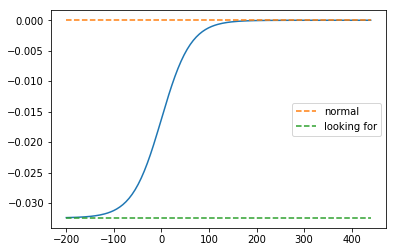

In [32]:
velist=np.linspace(-200,440,200)

plt.plot(velist,slopegiver(kappaminus,kappaplus,kappacosm,1.0,1.0,velist))
plt.plot([velist[0],velist[-1]],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label='normal')
plt.plot([velist[0],velist[-1]],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label='looking for')
plt.legend(loc='best')
plt.show()

In [33]:
def lnmgiver(kappaminus,kappaplus,kappacosm,A,B,ve):
    return (kappaminus-kappacosm)*ve+np.log(1.0+B/A*np.exp((kappacosm-kappaplus)*ve))+np.log(A)

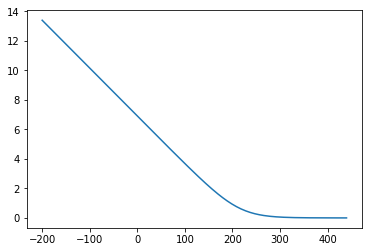

[-0.00783912  2.04471682]


In [34]:
plt.plot(velist,lnmgiver(kappaminus,kappaplus,kappacosm,1.0,10**(3),velist))
#plt.ylim(0,80)
plt.show()

print(np.polyfit(velist,lnmgiver(kappaminus,kappaplus,kappacosm,1.0,10**(0),velist),1.0))

In [35]:
def vegiver(r,r0):
    C1=6/Lambda*(-(rcosm**2.0*np.log(np.abs(rcosm-r0)))/((rcosm-rminus)*(rcosm-rneg)*(rcosm-rplus))+(rminus**2.0*np.log(np.abs(r0-rminus)))/((rcosm-rminus)*(rminus-rneg)*(rminus-rplus))+(rneg**2.0*np.log(np.abs(r0-rneg)))/((rcosm-rneg)*(rneg-rminus)*(rneg-rplus))+(rplus**2.0*np.log(np.abs(r0-rplus)))/((rcosm-rplus)*(rplus-rminus)*(rplus-rneg)))
    f=6/Lambda*(-(rcosm**2.0*np.log(np.abs(rcosm-r)))/((rcosm-rminus)*(rcosm-rneg)*(rcosm-rplus))+(rminus**2.0*np.log(np.abs(r-rminus)))/((rcosm-rminus)*(rminus-rneg)*(rminus-rplus))+(rneg**2.0*np.log(np.abs(r-rneg)))/((rcosm-rneg)*(rneg-rminus)*(rneg-rplus))+(rplus**2.0*np.log(np.abs(r-rplus)))/((rcosm-rplus)*(rplus-rminus)*(rplus-rneg)))
    
    return C1-f

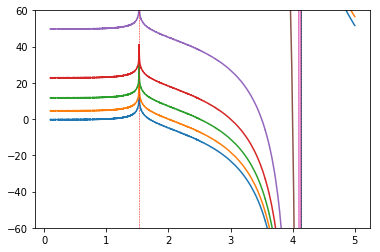

In [36]:
rlist=np.linspace(.1,5,10000)

plt.plot(rlist,-vegiver(rlist,1.0))
plt.plot(rlist,-vegiver(rlist,2.0))
plt.plot(rlist,-vegiver(rlist,2.5))
plt.plot(rlist,-vegiver(rlist,3.0))
plt.plot(rlist,-vegiver(rlist,3.5))
plt.plot(rlist,-vegiver(rlist,4.0))
plt.plot(rlist,-vegiver(rlist,4.1))
plt.ylim(-60,60)
plt.axvline(x=rplus,linewidth=0.5,linestyle='--',color='red')
plt.axvline(x=rminus,linewidth=0.5,linestyle='--',color='blue')
plt.axvline(x=rcosm,linewidth=0.5,linestyle='--',color='green')
plt.show()